# Synthea self-harm classification project: Exploratory Data Analysis

In [1]:
#load final_data.csv and view features

import pandas as pd

file_path = '/Users/SarahA/synthea/final_data_modified.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display all variable names (column names) in the DataFrame
variable_names = df.columns.tolist()
print("Variable Names:")
print(variable_names)

Variable Names:
['Id_x', 'PATIENT', 'CODE', 'DESCRIPTION', 'REASONCODE', 'REASONDESCRIPTION', 'ENCOUNTERCLASS', 'Id_y', 'BIRTHDATE', 'RACE', 'ETHNICITY', 'GENDER', 'INCOME', 'Id', 'DIAGNOSIS1', 'DIAGNOSIS2', 'DIAGNOSIS3', 'DIAGNOSIS4', 'DIAGNOSIS5', 'DIAGNOSIS6', 'DIAGNOSIS7', 'DIAGNOSIS8', 'SuicideRelatedEvent', 'INCOME_RANGE', 'Age', 'y_binary']


## Correlation Matrix

Variable Names:
['Id_x', 'PATIENT', 'CODE', 'DESCRIPTION', 'REASONCODE', 'REASONDESCRIPTION', 'ENCOUNTERCLASS', 'Id_y', 'BIRTHDATE', 'RACE', 'ETHNICITY', 'GENDER', 'INCOME', 'Id', 'DIAGNOSIS1', 'DIAGNOSIS2', 'DIAGNOSIS3', 'DIAGNOSIS4', 'DIAGNOSIS5', 'DIAGNOSIS6', 'DIAGNOSIS7', 'DIAGNOSIS8', 'SuicideRelatedEvent', 'INCOME_RANGE', 'Age', 'y_binary']


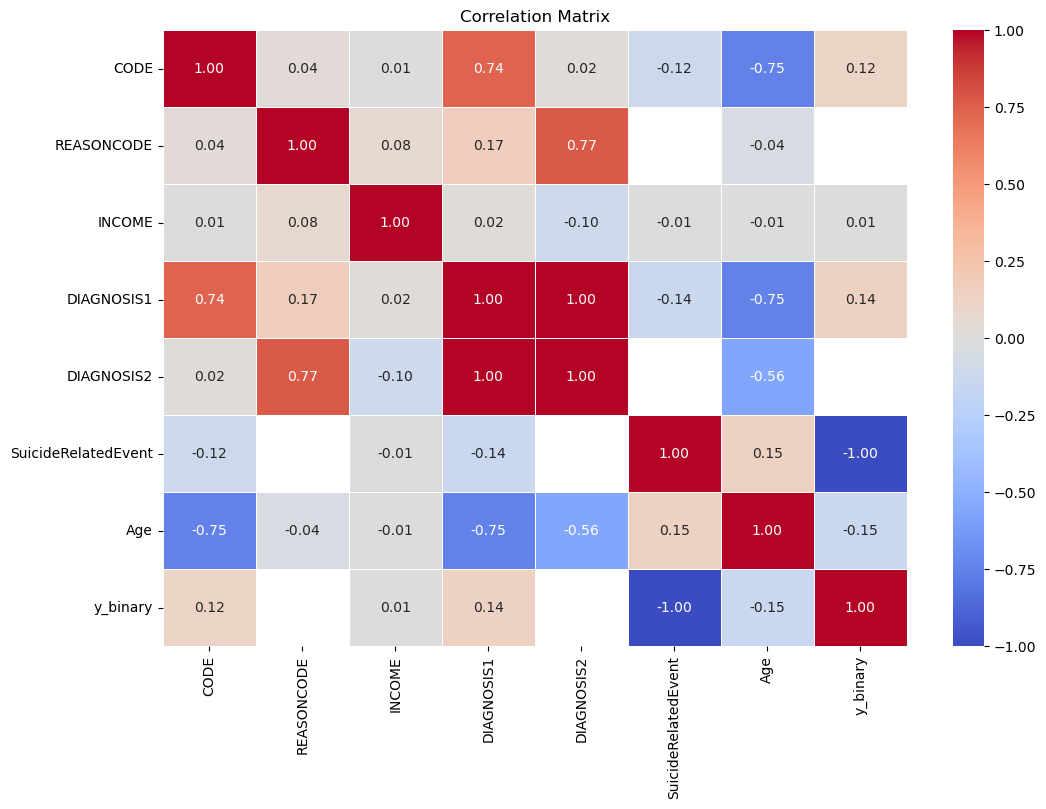

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = '/Users/SarahA/synthea/final_data_modified.csv'
df = pd.read_csv(file_path)

# Display all variable names (column names) in the DataFrame
variable_names = df.columns.tolist()
print("Variable Names:")
print(variable_names)

# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Remove specific columns from the DataFrame
columns_to_remove = ['DIAGNOSIS3', 'DIAGNOSIS4', 'DIAGNOSIS5', 'DIAGNOSIS6', 'DIAGNOSIS7', 'DIAGNOSIS8']
df_numeric = df_numeric.drop(columns=columns_to_remove)

# Compute the correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with a color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title("Correlation Matrix")

# Show the plot
plt.show()


## Exploratory Data Analysis

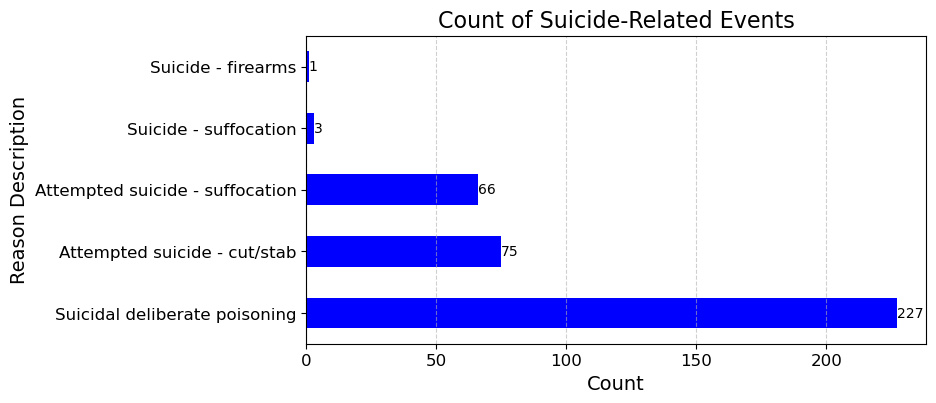

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

sns.set_palette("viridis")

# Calculate the counts
reason_counts = df['REASONDESCRIPTION'].value_counts()

# Create a bar chart of suicide-related events
ax = reason_counts.sort_values().plot(kind='barh', color='blue')

# Add annotations for each bar
for rect in ax.patches:
    ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2,
            f'{int(rect.get_width()):,}', ha='left', va='center', fontsize=10)

# Add labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Reason Description', fontsize=14)
plt.title('Count of Suicide-Related Events', fontsize=16)

# Add horizontal grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Invert the y-axis for better readability (highest count at the top)
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [4]:
#Describe additional variables of interest
print(df['ENCOUNTERCLASS'].value_counts())
print(df['CODE'].value_counts())
print(df['DESCRIPTION'].value_counts())
print(df['PATIENT'].value_counts())
print(df['GENDER'].value_counts())

ENCOUNTERCLASS
wellness      8366
outpatient    1266
ambulatory     284
emergency       84
Name: count, dtype: int64
CODE
162673000    4411
410620009    3951
33879002     1266
185347001     284
50849002       84
308646001       4
Name: count, dtype: int64
DESCRIPTION
General examination of patient (procedure)                          4411
Well child visit (procedure)                                        3951
Administration of vaccine to produce active immunity (procedure)    1266
Encounter for problem                                                284
Emergency room admission (procedure)                                  84
Death Certification                                                    4
Name: count, dtype: int64
PATIENT
31ee016b-222a-e511-b21b-703499062fef    10
4f96b35a-51f1-837b-1f9e-a6710612de57    10
3694f183-599d-abaf-2d91-604fe1a82973     8
dc5f59b4-e278-6545-05bb-c692a4067f05     7
6b1406d3-12dc-dd8b-5dc2-b60363656808     6
                                        ..
7b

<Figure size 1200x600 with 0 Axes>

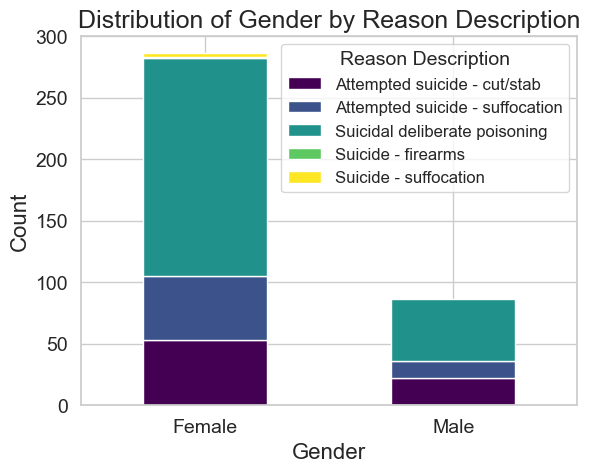

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

gender_reason_counts = df.groupby(['GENDER', 'REASONDESCRIPTION']).size().unstack().fillna(0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
ax = gender_reason_counts.plot(kind='bar', stacked=True, colormap='viridis')

# Customize the plot
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Gender by Reason Description', fontsize=18)
plt.xticks(rotation=0, ha='center', fontsize=14)

# Set custom labels for x-axis
ax.set_xticklabels(['Female', 'Male'], rotation=0)

plt.yticks(fontsize=14)
plt.legend(title='Reason Description', fontsize=12, title_fontsize=14)

# Show the plot
plt.show()

In [6]:
import numpy as np 

ages = df['Age']

# Descriptive statistics
min_age = min(ages)
max_age = max(ages)
mean_age = np.mean(ages)
median_age = np.median(ages)
std_dev_age = np.std(ages)

# Display descriptive statistics
print(f"Min Age: {min_age} years")
print(f"Max Age: {max_age} years")
print(f"Mean Age: {mean_age:.2f} years")
print(f"Median Age: {median_age} years")
print(f"Standard Deviation: {std_dev_age:.2f} years")

Min Age: 0 years
Max Age: 110 years
Mean Age: 39.28 years
Median Age: 38.0 years
Standard Deviation: 27.79 years


/Users/SarahA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SarahA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SarahA/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


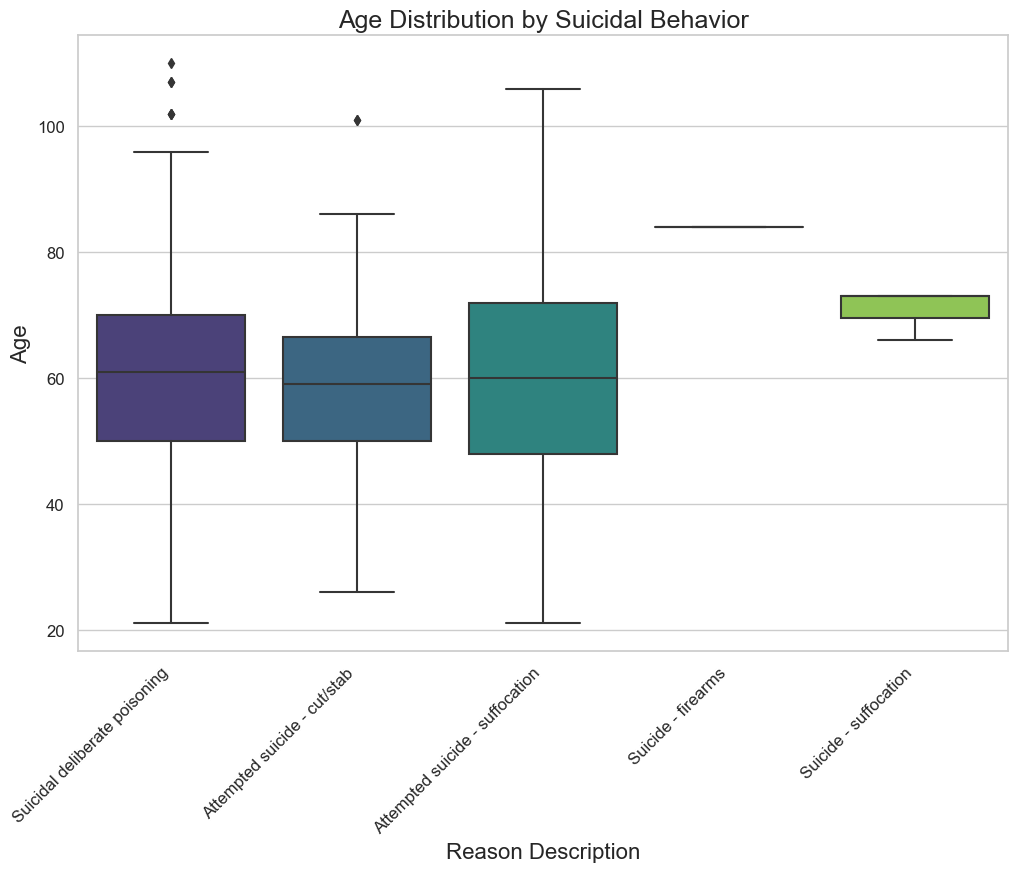

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Age' and 'REASONDESCRIPTION' are the relevant columns
# and 'df' is your DataFrame
sns.set(style="whitegrid")  # Set the style for better readability

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='REASONDESCRIPTION', y='Age', data=df, palette='viridis')

# Customize the plot
plt.xlabel('Reason Description', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.title('Age Distribution by Suicidal Behavior', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

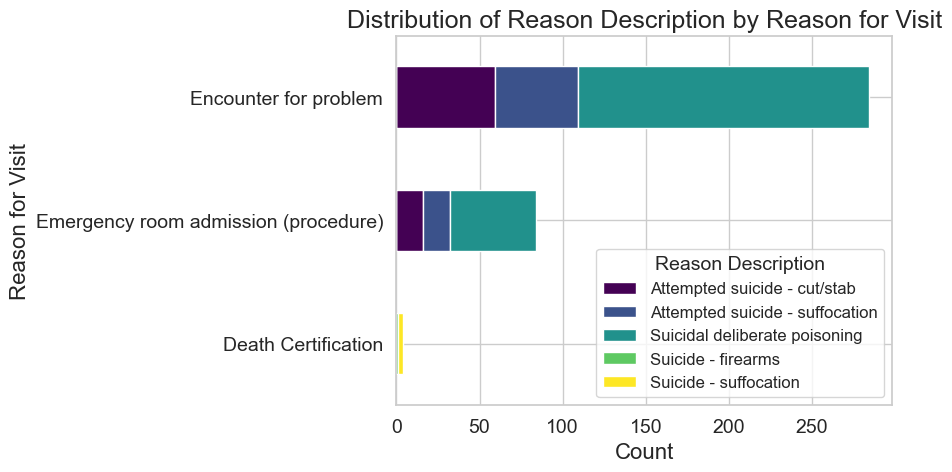

In [8]:
sns.set(style="whitegrid") 

reason_counts = df.groupby(['DESCRIPTION', 'REASONDESCRIPTION']).size().unstack().fillna(0)

# Create a grouped horizontal bar chart
plt.figure(figsize=(12, 6))
ax = reason_counts.plot(kind='barh', stacked=True, colormap='viridis')

# Customize the plot
plt.xlabel('Count', fontsize=16)
plt.ylabel('Reason for Visit', fontsize=16)
plt.title('Distribution of Reason Description by Reason for Visit', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Reason Description', fontsize=12, title_fontsize=14)

# Show the plot
plt.show()